In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Path dataset
dataset_dir = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\PlantVillage'

# Parameter
batch_size = 16
img_size = (128, 128)

# 1. Load data (tanpa split)
full_dataset = image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
)

# Ambil data dan label dalam bentuk numpy
data, labels = [], []
for img_batch, label_batch in full_dataset:
    data.append(img_batch.numpy())
    labels.append(label_batch.numpy())

data = np.concatenate(data)
labels = np.concatenate(labels)

# 2. Split data train-test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=123
)

# 3. Flatten input (dari (128,128,3) ke 1D)
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# 4. Buat tf.data.Dataset dari data flatten
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_flat, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_flat, y_test)).batch(batch_size)

# 5. Definisikan model ANN
input_dim = X_train_flat.shape[1]  # 49152

model_ann = models.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# 6. Compile model
model_ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Training model
epochs = 10
history_ann = model_ann.fit(
    train_dataset,
    epochs=epochs
)

# 8. Evaluasi model dengan test dataset
test_loss, test_accuracy = model_ann.evaluate(test_dataset)
print(f"Test accuracy ANN: {test_accuracy:.2f}")
print(f"Test loss ANN: {test_loss:.2f}")


Found 2152 files belonging to 3 classes.
Epoch 1/10


C:\Users\BSOK AKU\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.5134 - loss: 1237.9402
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.6508 - loss: 229.8056
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7342 - loss: 87.4499
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7886 - loss: 37.8659
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.7236 - loss: 48.7975
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.7596 - loss: 37.1898
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.7941 - loss: 15.9400
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7856 - loss: 14.1286
Epoch 9/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7401 - loss: 18.1629
Epoch 10/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.8446 - loss: 6.0184
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7934 - loss: 4.3433
Test accuracy ANN: 0.78
Test loss ANN: 5.10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


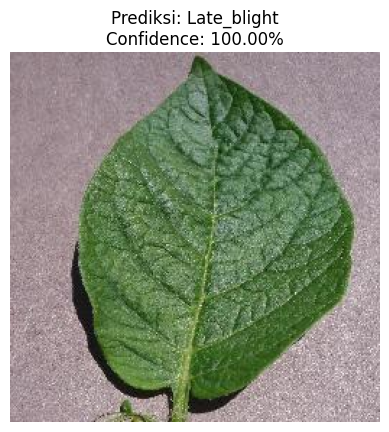

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Misal class_names sesuai urutan label dataset kamu
class_names = ['Early_blight', 'Healthy', 'Late_blight']

def predict_new_image_ann(image_path, model, img_size=(128, 128)):
    # Load dan resize gambar ke ukuran yang sesuai model
    img = image.load_img(image_path, target_size=img_size)
    
    # Konversi gambar ke array
    img_array = image.img_to_array(img)
    
    # Flatten sesuai input model ANN (1D)
    img_array = img_array.reshape(1, -1)  # batch size 1
    
    # Normalisasi opsional (sesuai preprocessing training)
    # img_array = img_array / 255.0
    
    # Prediksi dengan model
    predictions = model.predict(img_array)
    
    # Ambil kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(predictions[0])
    
    # Confidence/probabilitas tertinggi
    confidence = np.max(predictions[0])
    
    # Tampilkan gambar dan hasil prediksi
    plt.imshow(image.load_img(image_path))
    plt.axis('off')
    plt.title(f"Prediksi: {class_names[predicted_class]}\nConfidence: {confidence*100:.2f}%")
    plt.show()
    
    return predicted_class, confidence

# Contoh penggunaan:
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Potato.jpg'  # Ganti path gambar baru

predicted_idx, conf = predict_new_image_ann(image_path, model_ann)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


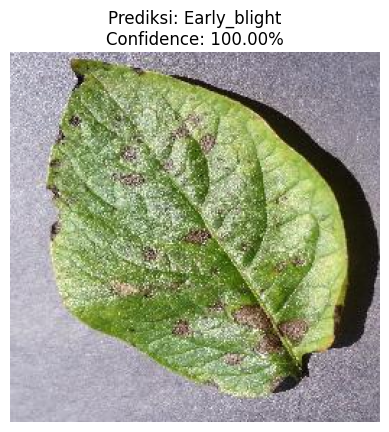

In [10]:
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Early_blight.jpg'  # Ganti path gambar baru

predicted_idx, conf = predict_new_image_ann(image_path, model_ann)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


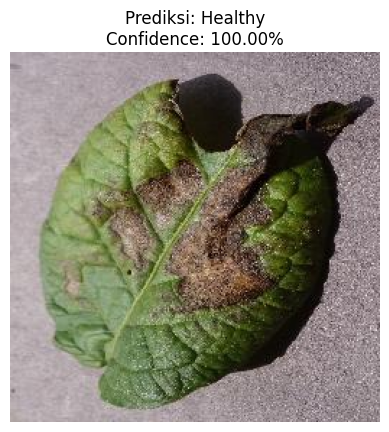

In [13]:
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\late_blight.jpg'  # Ganti path gambar baru

predicted_idx, conf = predict_new_image_ann(image_path, model_ann)